In [1]:
import requests
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime
import numpy as np




url = "https://projet.fgdou.ovh/api/bornes"


In [23]:
response = requests.get(url)

if response.status_code == 200:
    data = json.loads(response.text)
    tableaux = []
    for item in data:
        tableaux.append(item)
else:
    print('La requête a échoué avec le code d\'erreur', response.status_code)


In [24]:
#Définition du dataframe
df = pd.DataFrame(tableaux, columns=['id', 'latitude','longitude', 'date'])

df = df.loc[df['date'] != 'null']
df['date'] = df['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='coerce'))
df.to_csv('my_dataset.csv', index=False)


   annee  nombre de bornes
0   2014                 6
1   2015               175
2   2016              1114
3   2017              3066
4   2018              2167
5   2019              3253
6   2020              8467
7   2021             17050
8   2022             16745
9   2023              2648


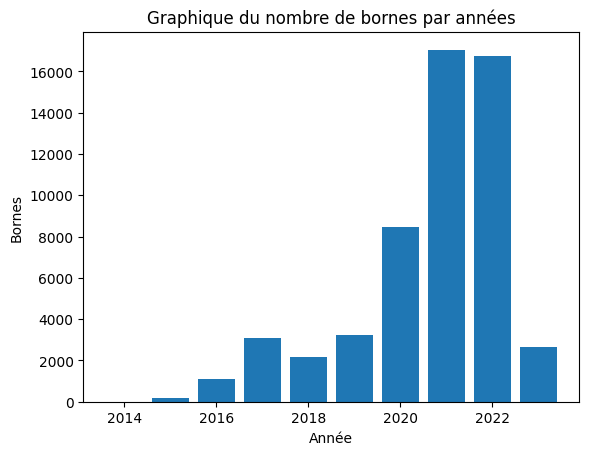

In [31]:
import matplotlib.pyplot as plt
df['annee'] = df['date'].dt.year
df_annee = df.groupby('annee')['id'].count().reset_index()
df_annee = df_annee.rename(columns={'id': 'nombre de bornes'})
print(df_annee)
plt.bar(df_annee['annee'], df_annee['nombre de bornes'])
plt.xlabel('Année')
plt.ylabel('Bornes')
plt.title('Graphique du nombre de bornes par années')

# Afficher le graphique
plt.show()


In [19]:
# Séparation des données en ensembles d'entraînement et de test

X=df[['date']]
y=df[['latitude','longitude']]


In [10]:

# Création du modèle
model = LinearRegression()

# Entraînement du modèle
model.fit(X,y)

date_string = '2024-07-28'
date_object = datetime.strptime(date_string, '%Y-%m-%d')
timestamp = date_object.timestamp()
date_array = np.array([timestamp])
prediction = model.predict(date_array.reshape(1, -1))
print(prediction)

[[44.47756594 -5.7038233 ]]


C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [52]:
import folium

# Coordonnées de Paris
lat = 48.8566
lon = 2.3522

# Création de la carte centrée sur la France
map_fr = folium.Map(location=[46.2276, 2.2137], zoom_start=6)

# Ajout du marqueur pour Paris
folium.Marker(location=prediction, popup='Paris').add_to(map_fr)

# Affichage de la carte
map_fr

In [11]:
#Crée un dataset avec la date et le nombre de nouvelles bornes à cette date.
df_grouped = df.groupby('date')['id'].count().reset_index()
df_grouped = df_grouped.rename(columns={'id': 'nombre de bornes'})


In [12]:
df_grouped.to_csv('my_dataset2.csv', index=False)

In [13]:
X2=df_grouped['date'].values.reshape(-1, 1)
y2=df_grouped['nombre de bornes'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Création du modèle
model2 = LinearRegression()

# Entraînement du modèle
model2.fit(X_train, y_train)

date_string = '2024-07-11'
date_object = datetime.strptime(date_string, '%Y-%m-%d')
timestamp = date_object.timestamp()
date_array = np.array([timestamp])
prediction = model2.predict(date_array.reshape(1, -1))
print(prediction[0][0])

44.549828225601075


C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2023-04-04
2023-04-05
2023-04-06
2023-04-07
2023-04-08
2023-04-09
2023-04-10
2023-04-11
2023-04-12
2023-04-13
2023-04-14
2023-04-15
2023-04-16
2023-04-17
2023-04-18
2023-04-19
2023-04-20
2023-04-21
2023-04-22
2023-04-23
2023-04-24
2023-04-25
2023-04-26
2023-04-27
2023-04-28
2023-04-29
2023-04-30
2023-05-01
2023-05-02
2023-05-03
2023-05-04
2023-05-05
2023-05-06
2023-05-07
2023-05-08
2023-05-09
2023-05-10
2023-05-11
2023-05-12
2023-05-13
2023-05-14
2023-05-15
2023-05-16
2023-05-17
2023-05-18
2023-05-19
2023-05-20
2023-05-21
2023-05-22
2023-05-23
2023-05-24
2023-05-25
2023-05-26
2023-05-27
2023-05-28
2023-05-29
2023-05-30
2023-05-31
2023-06-01
2023-06-02
2023-06-03
2023-06-04
2023-06-05
2023-06-06
2023-06-07
2023-06-08
2023-06-09
2023-06-10
2023-06-11
2023-06-12
2023-06-13
2023-06-14
2023-06-15
2023-06-16
2023-06-17
2023-06-18
2023-06-19
2023-06-20
2023-06-21
2023-06-22
2023-06-23
2023-06-24
2023-06-25
2023-06-26
2023-06-27
2023-06-28
2023-06-29
2023-06-30
2023-07-01
2023-07-02
2023-07-03

In [15]:
from datetime import datetime, timedelta

# Convertir la date de la chaîne de caractères en objet datetime


def  new_born(date):
    date_str = date
    end_date = datetime.strptime(date_str, '%Y-%m-%d')

    # Obtenir la date d'aujourd'hui
    start_date = datetime.today()

    # Boucle sur les dates entre start_date et end_date en incrémentant d'un jour à chaque itération
    while start_date <= end_date:
        start_date.strftime('%Y-%m-%d')
        date_object = datetime.strptime(date_string, '%Y-%m-%d')
        timestamp = date_object.timestamp()
        date_array = np.array([timestamp])
        prediction = model2.predict(date_array.reshape(1, -1))
        new_data = {'date': start_date.strftime('%Y-%m-%d'), 'nombre de bornes': int(prediction[0][0])}
        df_grouped = df_grouped.append(new_data, ignore_index=True)
        start_date += timedelta(days=1)
        
new_born('2023-12-25')

C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


UnboundLocalError: local variable 'df_grouped' referenced before assignment